In [3]:
%matplotlib inline
%pip install pysd
import pysd
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.2/150.2 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.0/886.0 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 12.2 MB/s eta 0:00:00
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160673 sha256=c752395e33a473e11d4e53fd03151cbda1cba1ef0ff2eeff4ea2779f1bc0c69d
  Stored in directory: /root/.cache/pip/wheels/d6/1d/c8/8c29be1d73ca42d15977c75193d9f39a98499413c2838ac54c
Successfully built odfpy


## Модель распространения инфекции

### Загрузка стартовой модели

In [4]:
model = pysd.load('sir.py')

In [5]:
output = model.run(return_columns=['infected', 'recovered'])

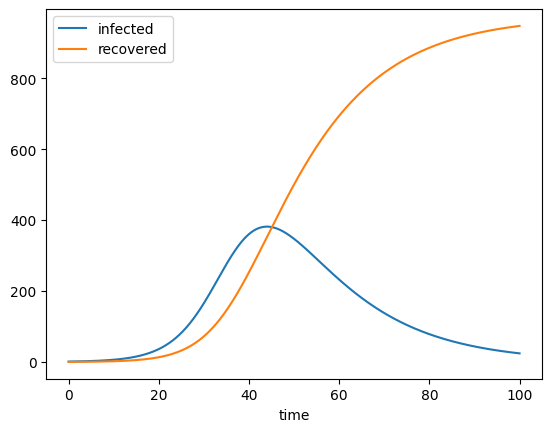

In [6]:
output.plot()
plt.show()

Население условно разделяется на три категории в соответствии с их состоянием: $Susceptible$ – восприимчивый к заболеванию, $Infectious$ – зараженный и $Recovered$ – выздоровевший. По мере того, как люди заражаются, они перемещаются из категории $Susceptible$ в категорию $Infectious$, и затем, по мере выздоровления – в категорию $Recovered$. Заболевание распространяется по мере того, как зараженные люди контактируют и передают заболевание восприимчивым (положительная обратная связь), в то же время уменьшая численность категории восприимчивых к заболеванию людей (отрицательная обратная связь). Выздоровление от заболевания образует другую отрицательную обратную связь.

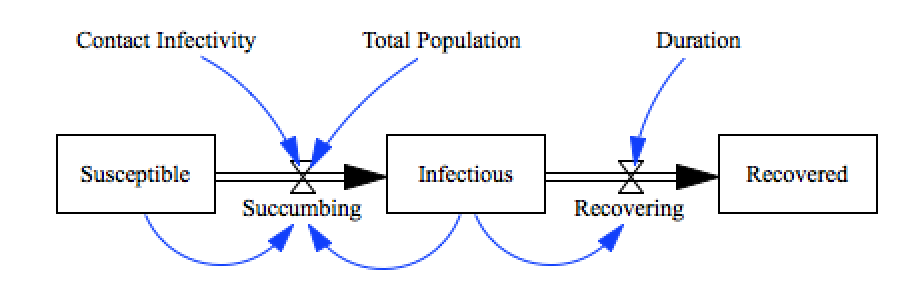

### Задание (выполнять в отдельном .py файле, не портить текущий .ipynb файл, вой код писать ниже)

Реализовать дополнительно следующую логику:
1. Сделать начальное число зараженных не константой, а параметром модели. Сделать параметр $infectivity$ функцией числа зараженных, согласно жизненным реалям (задать функцию самостоятельно).
2. Добавить возможности смерти от болезни с некоторой вероятностью $p$ ($p$ – параметр).
3. Реализовать возможность повторного заражения после некоторого периода спада имунитета $L$ ($L$ – параметр).

Вывести график инфицированных по времени, а также вычислить математическое ожидание и дисперсию числа выздоровевших на 50-м шаге моделирования при варьировании параметрами $L$ от $5$ до $10$, $p$ от $0.01$ до $0.1$ и $ContactRate$ от $3$ до $10$.

### Решение пункта 1

In [ ]:
# в коде модели
# import math
# def infectivity():
    # return math.exp(infected() / total_population()) * 0.03
    # min = 0.03, max = 0.081...
    # как советовалось на консультации, берём экспоненту от числа заражённых в разумных пределах от 3 до 8 процентов

<Axes: xlabel='time'>

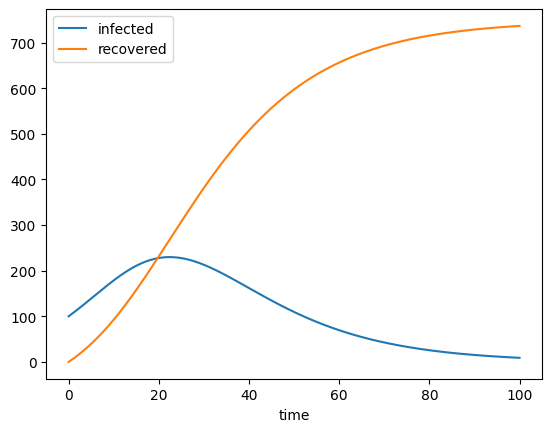

In [87]:
params= {
    "initial_infected": 100,
    }
model = pysd.load('sir_1.py')
result = model.run(params, return_columns=['infected', 'recovered'])
result.plot()

### Решение пункта 2

In [ ]:
# в коде модели новый параметр p и новый контейнер мертвецов с интенсивностью death (которая при этом вычитается в _integ_infected)

# def death():
    # return infected() * p()

# а часть потока уходит в recovered

# def recovery():
    # return infected() * (1 - p()) / period_of_infection()

<Axes: xlabel='time'>

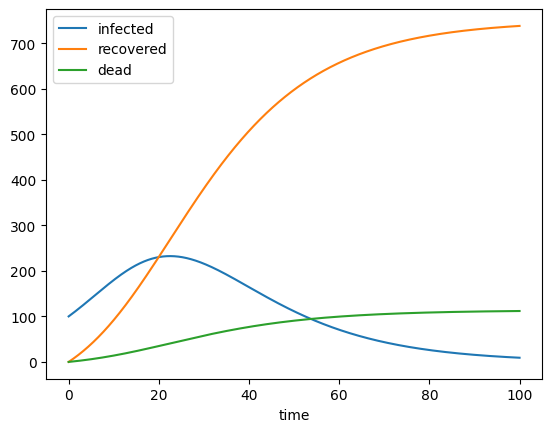

In [89]:
params= {
    "initial_infected": 100,
    "p": 0.01
    }
model = pysd.load('sir_2.py')
result = model.run(params, return_columns=['infected', 'recovered', 'dead'])
result.plot()

Отлично, теперь часть людей постепенно умирает

### Решение пункта 3

In [ ]:
# в коде модели новый параметр L и новая интенсивность, которая добавляется к _integ_susceptible и вычитается в _integ_recovered

# def relapse():
    # return recovered() / L()

<Axes: xlabel='time'>

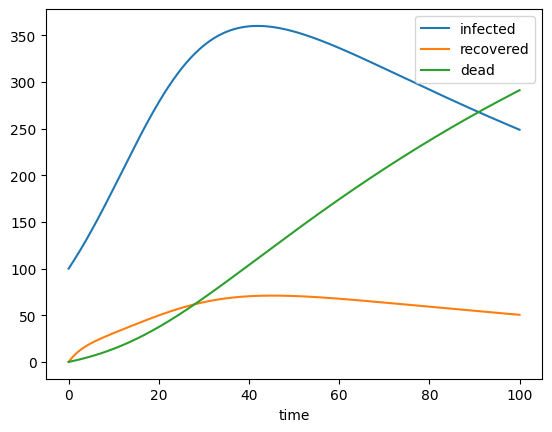

In [90]:
params= {
    "initial_infected": 100,
    "p": 0.01,
    "L": 3
    }
model = pysd.load('sir_3.py')
result = model.run(params, return_columns=['infected', 'recovered', 'dead'])
result.plot()

Ещё лучше, теперь люди быстро заражаются повторно и по итогу уже много людей умирает

### Математическое ожидание и дисперсия числа выздоровевших на 50-м шаге моделирования при варьировании параметрами

In [132]:
import numpy as np
import itertools

model = pysd.load('sir_3.py')

При одном больном изначально

In [133]:
import numpy as np

rec_grid = []

for L in np.arange(5, 10+1, 1):
    for p in np.arange(0.01, 0.1+0.01, 0.01):
        for ContactRate in np.arange(3, 10+1, 1):
            params= {
                "final_time": 50,
                "contact rate": ContactRate,
                "L": L,
                "p": p
                }
            rec_grid.append(model.run(params, return_columns=['recovered']).values[-1][0])
rec_grid = np.array(rec_grid)
print('Матожидание числа выздоровевших равно ', rec_grid.mean(), ', а дисперсия равна ', rec_grid.var())

Матожидание числа выздоровевших равно  41.047441173166 , а дисперсия равна  3256.252980594618


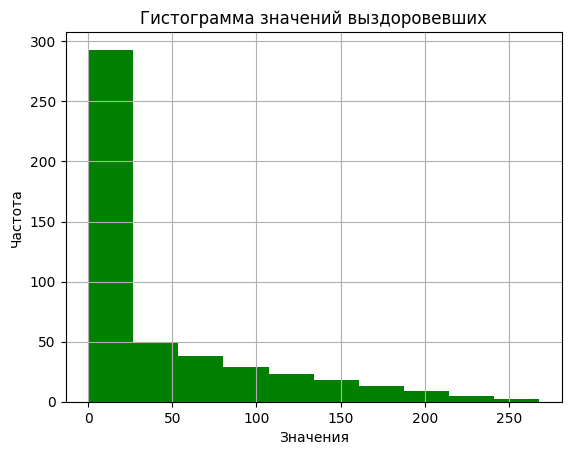

In [121]:
plt.hist(rec_grid, bins=10, color='green', alpha=1)
plt.title('Гистограмма значений выздоровевших')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

При 100 больных изначально

In [143]:
import numpy as np

rec_grid = []

for L in np.arange(5, 10+1, 1):
    for p in np.arange(0.01, 0.1+0.01, 0.01):
        for ContactRate in np.arange(3, 10+1, 1):
            params= {
                "initial_infected": 100,
                "final_time": 50,
                "contact rate": ContactRate,
                "L": L,
                "p": p
                }
            rec_grid.append(model.run(params, return_columns=['recovered']).values[-1][0])
rec_grid = np.array(rec_grid)
print('Матожидание числа выздоровевших равно ', rec_grid.mean(), ', а дисперсия равна ', rec_grid.var())

Матожидание числа выздоровевших равно  63.12877503650966 , а дисперсия равна  2801.0174158557597


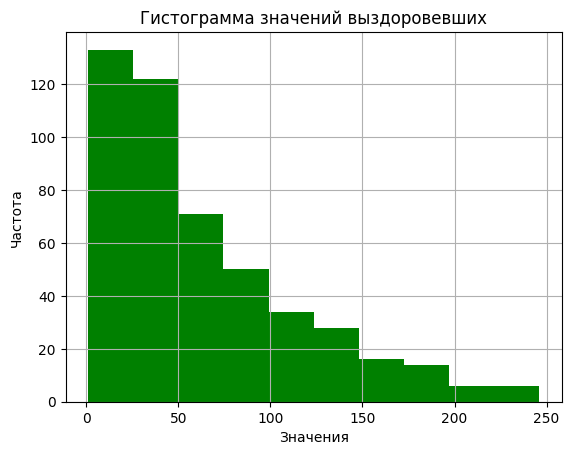

In [144]:
plt.hist(rec_grid, bins=10, color='green', alpha=1)
plt.title('Гистограмма значений выздоровевших')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

### Графики инфицированных по времени при фиксированных L, p в зависимости от CR

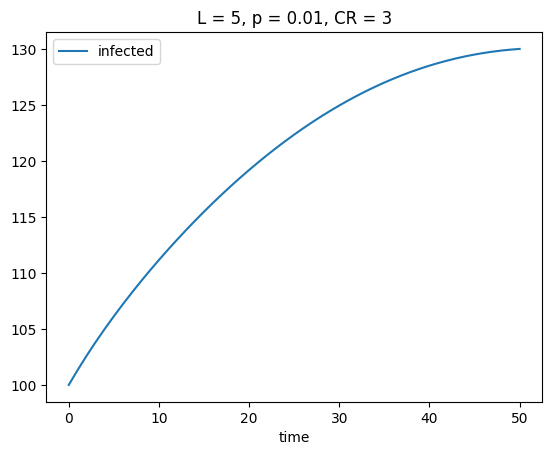

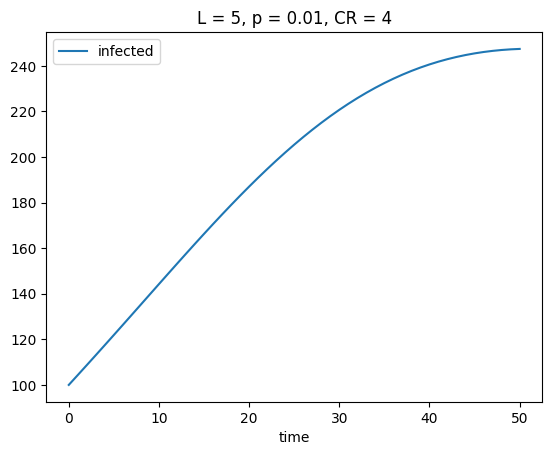

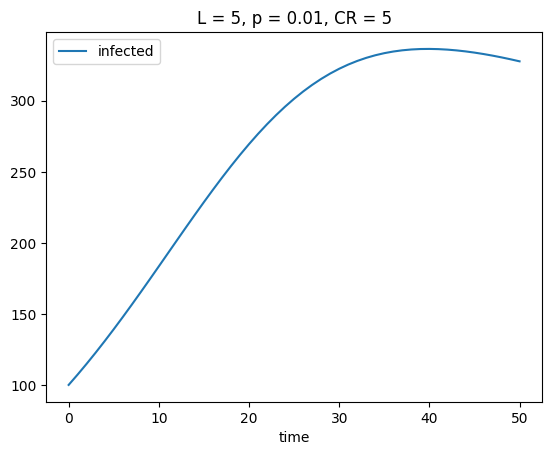

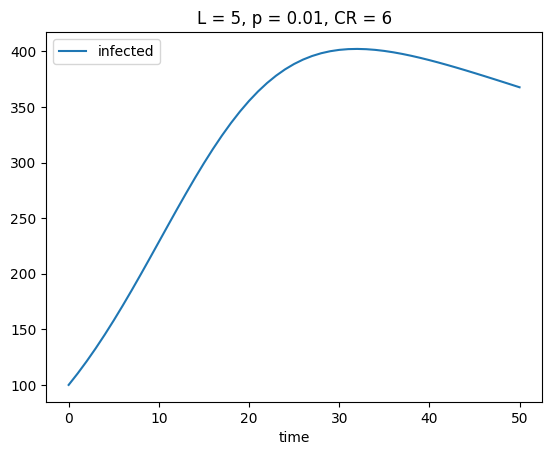

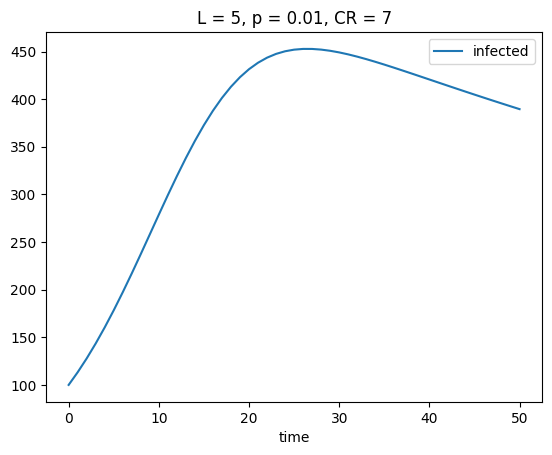

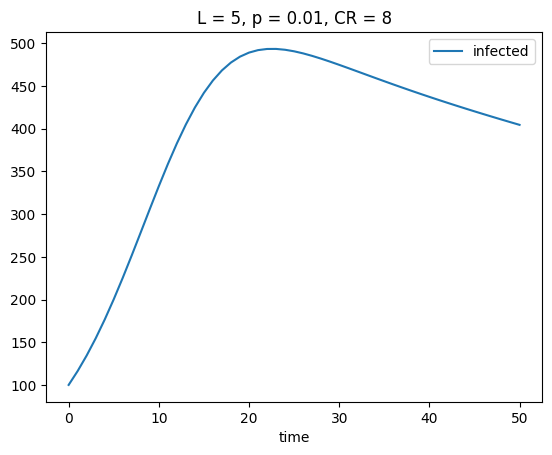

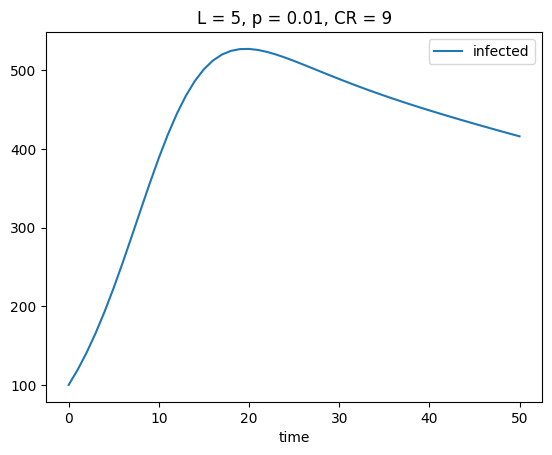

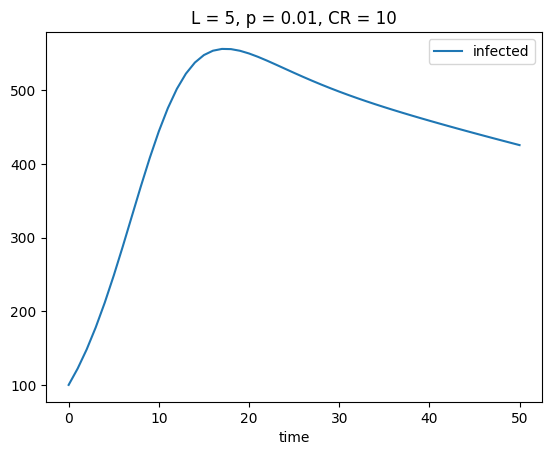

In [145]:
L = 5
p = 0.01
for ContactRate in np.arange(3, 10+1, 1):
            params= {
                "initial_infected": 100,
                "contact rate": ContactRate,
                "L": L,
                "p": p
                }
            result = model.run(params, return_columns=['infected'])
            result.plot(title = "L = " + str(L) + ", p = " + str(p) + ", CR = " + str(ContactRate))


замечаю, что при увеличении CR на единицу количество инфицированных растёт в несколько раз, то есть зависимость степенная, а не линейная

### Графики инфицированных по времени при фиксированных L, CR в зависимости от p

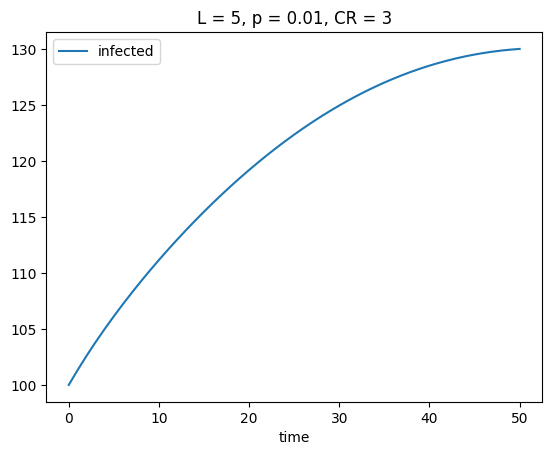

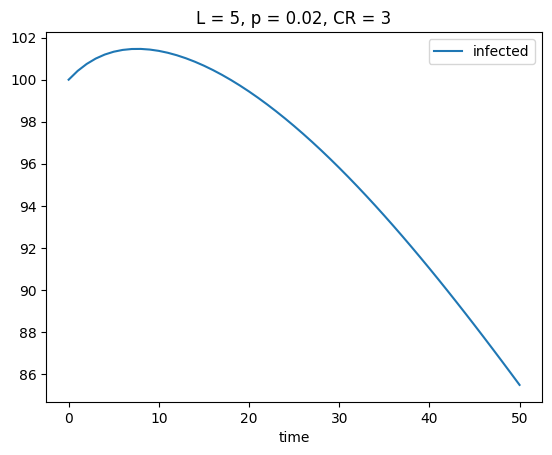

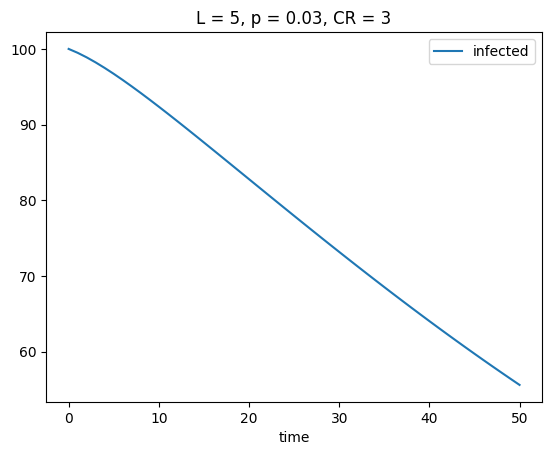

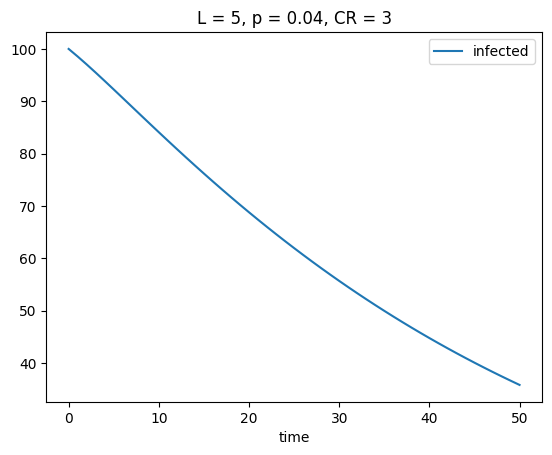

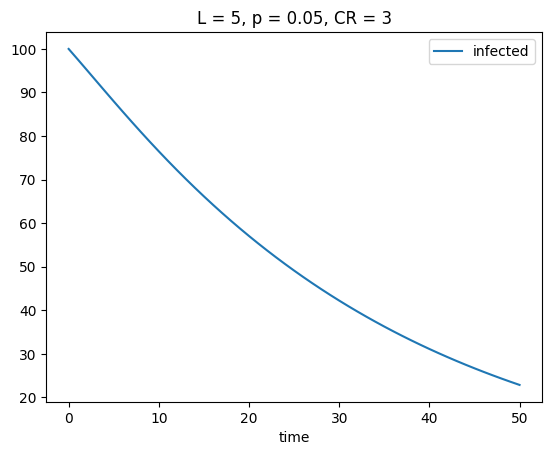

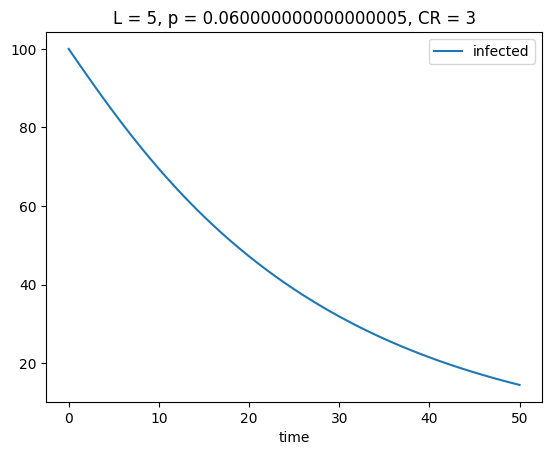

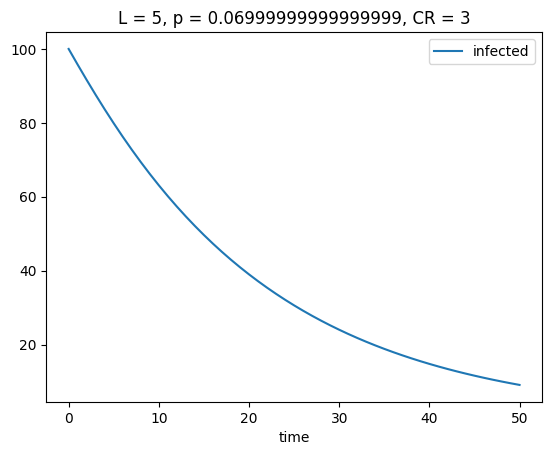

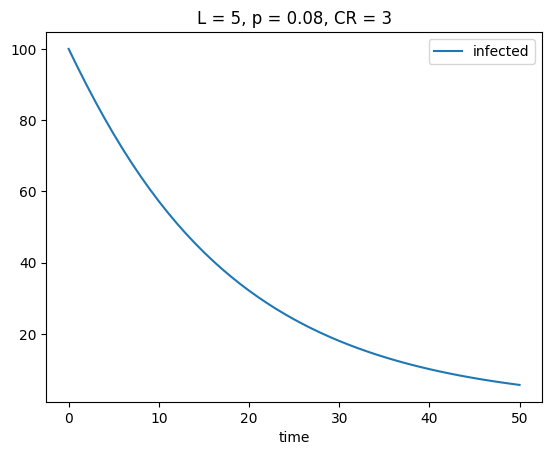

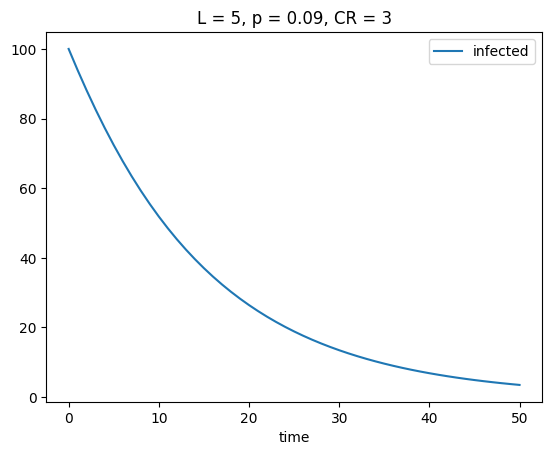

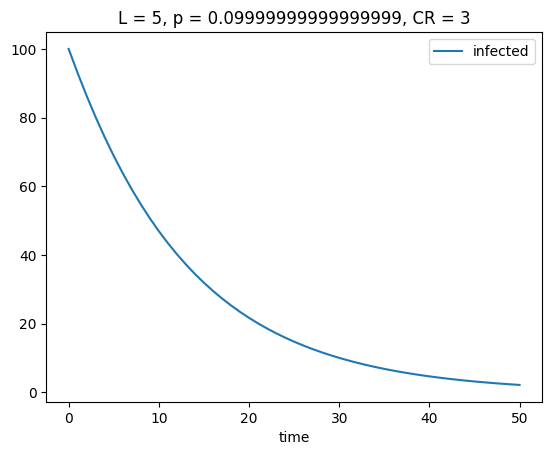

In [146]:
L = 5
CR = 3
for p in np.arange(0.01, 0.1+0.01, 0.01):
            params= {
                "initial_infected": 100,
                "contact rate": CR,
                "L": L,
                "p": p
                }
            result = model.run(params, return_columns=['infected'])
            result.plot(title = "L = " + str(L) + ", p = " + str(p) + ", CR = " + str(CR))

при достаточно большой смертности инфецированные сразу умирают

### Графики инфицированных по времени при фиксированных p, CR в зависимости от L

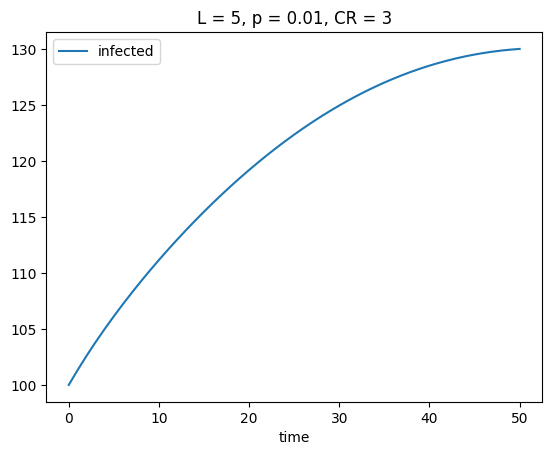

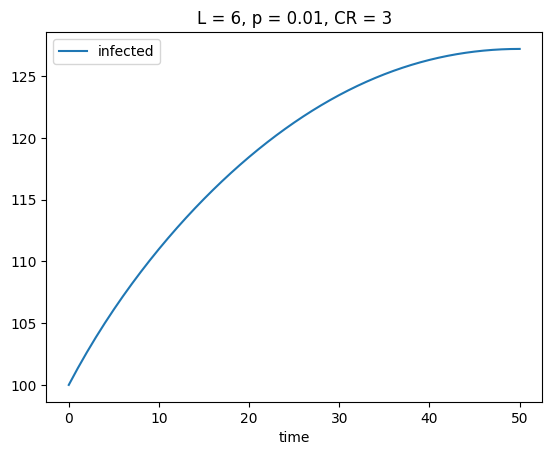

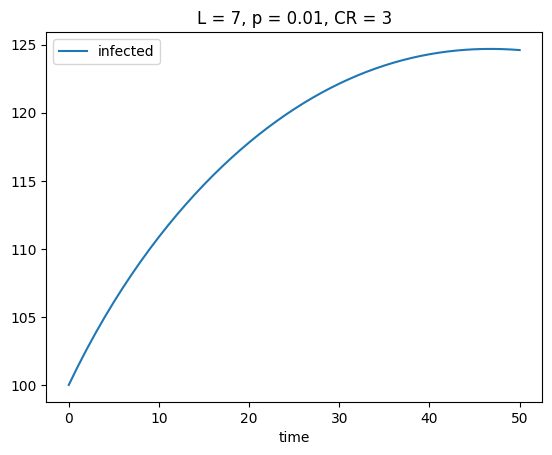

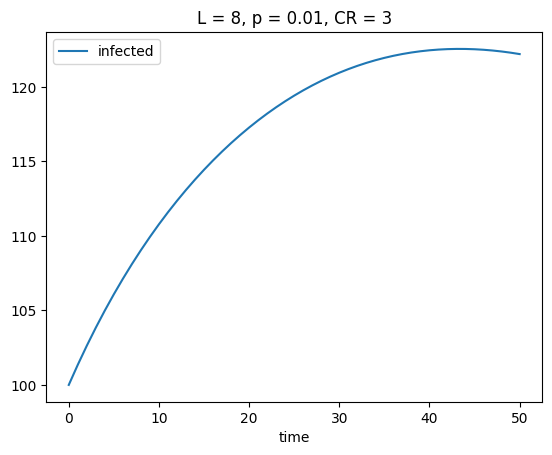

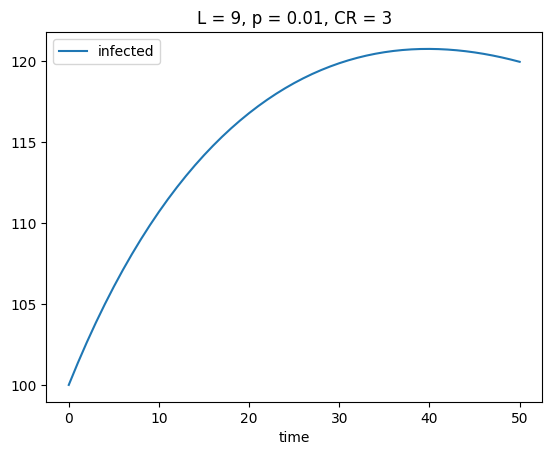

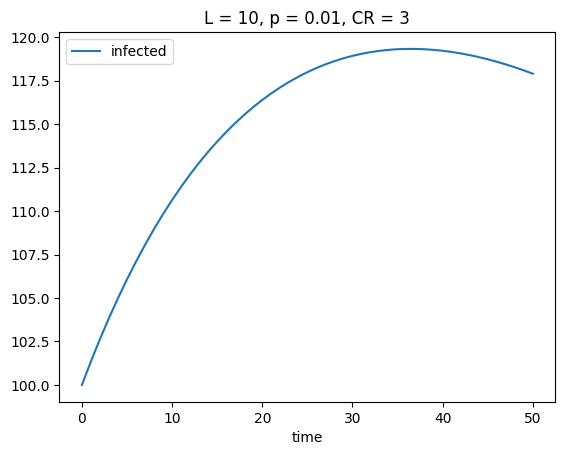

In [147]:
СR = 5
p = 0.01
for L in np.arange(5, 10+1, 1):
            params= {
                "initial_infected": 100,
                "contact rate": CR,
                "L": L,
                "p": p
                }
            result = model.run(params, return_columns=['infected'])
            result.plot(title = "L = " + str(L) + ", p = " + str(p) + ", CR = " + str(CR))

Увеличение L лишь немного уменьшает число инфецированных, потому что повторное заражение происходит менее интенсивно

### Сформируем датафрейм

In [169]:
import pandas as pd

results = []

for L in np.arange(5, 10+1, 1):
    for p in np.arange(0.01, 0.1+0.01, 0.01):
        for cr in np.arange(3, 10+1, 1):
            params= {
                "initial_infected": 100,
                "contact rate": CR,
                "L": L,
                "p": p
                }
            values = model.run(params, return_columns=['infected', 'recovered', 'dead']).values[-1]
            row = (L, p, cr, *values)
            results.append(row)

columns = ['L', 'p', 'CR', 'infected', 'recovered', 'dead' ]

df = pd.DataFrame(results, columns=columns)

print(df.head())

   L     p  CR  infected  recovered       dead
0  5  0.01   3  129.9911  42.664679  59.836939
1  5  0.01   4  129.9911  42.664679  59.836939
2  5  0.01   5  129.9911  42.664679  59.836939
3  5  0.01   6  129.9911  42.664679  59.836939
4  5  0.01   7  129.9911  42.664679  59.836939


Проверим гипотезу про число инфецированных, что имеется положительная зависимость с CR и отрицательная зависимость с p

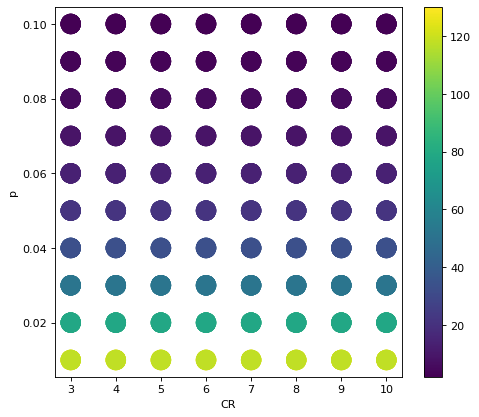

In [170]:
from matplotlib.pyplot import figure
figure(figsize=(7, 6), dpi=80)
plt.scatter(df["CR"], df["p"], c=df["infected"], s=300)
plt.xlabel("CR")
plt.ylabel("p")
plt.colorbar()

Вижу, что CR почти не влияет, а вот р влияет сильно. Теперь проверим зависимость по L и p

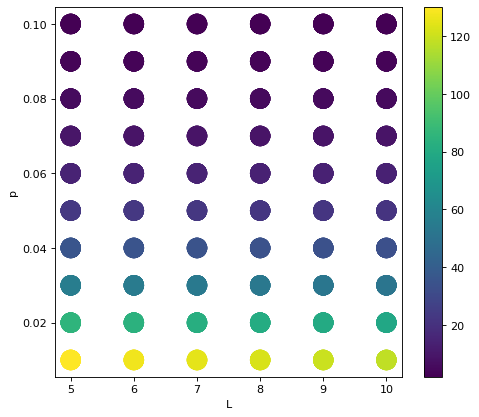

In [171]:
from matplotlib.pyplot import figure
figure(figsize=(7, 6), dpi=80)
plt.scatter(df["L"], df["p"], c=df["infected"], s=300)
plt.xlabel("L")
plt.ylabel("p")
plt.colorbar()

Напоследок ещё тупо чекнем корреляции

In [172]:
pearson_corr = df['infected'].corr(df['p'], method='pearson')
spearman_corr = df['infected'].corr(df['p'], method='spearman')
kendall_corr = df['infected'].corr(df['p'], method='kendall')

print("Pearson:", pearson_corr)
print("Spearman:", spearman_corr)
print("Kendall:", kendall_corr)

Pearson: -0.8949862872626212
Spearman: -0.9951256586030299
Kendall: -0.9566892062149209


In [173]:
pearson_corr = df['infected'].corr(df['L'], method='pearson')
spearman_corr = df['infected'].corr(df['L'], method='spearman')
kendall_corr = df['infected'].corr(df['L'], method='kendall')

print("Pearson:", pearson_corr)
print("Spearman:", spearman_corr)
print("Kendall:", kendall_corr)

Pearson: -0.025361493137703296
Spearman: -0.09861502720116282
Kendall: -0.09205746178983235


In [174]:
pearson_corr = df['infected'].corr(df['CR'], method='pearson')
spearman_corr = df['infected'].corr(df['CR'], method='spearman')
kendall_corr = df['infected'].corr(df['CR'], method='kendall')

print("Pearson:", pearson_corr)
print("Spearman:", spearman_corr)
print("Kendall:", kendall_corr)

Pearson: -1.3504095955210729e-18
Spearman: 0.0
Kendall: 0.0


На итоговое количество заражённых больше всего влияет смертность: чем выше смертность, тем меньше в конце остаётся заражённых - они умирают. Также немного влияет период повторного заражения - чем больше, тем меньше в конце остаётся заражённых

In [175]:
pearson_corr = df['recovered'].corr(df['p'], method='pearson')
spearman_corr = df['recovered'].corr(df['p'], method='spearman')
kendall_corr = df['recovered'].corr(df['p'], method='kendall')

print("Pearson:", pearson_corr)
print("Spearman:", spearman_corr)
print("Kendall:", kendall_corr)

Pearson: -0.8732780121093991
Spearman: -0.9666456313366132
Kendall: -0.8692879700915825


In [176]:
pearson_corr = df['recovered'].corr(df['L'], method='pearson')
spearman_corr = df['recovered'].corr(df['L'], method='spearman')
kendall_corr = df['recovered'].corr(df['L'], method='kendall')

print("Pearson:", pearson_corr)
print("Spearman:", spearman_corr)
print("Kendall:", kendall_corr)

Pearson: 0.23255017978265508
Spearman: 0.2468193252234818
Kendall: 0.18288749075580024


In [177]:
pearson_corr = df['recovered'].corr(df['CR'], method='pearson')
spearman_corr = df['recovered'].corr(df['CR'], method='spearman')
kendall_corr = df['recovered'].corr(df['CR'], method='kendall')

print("Pearson:", pearson_corr)
print("Spearman:", spearman_corr)
print("Kendall:", kendall_corr)

Pearson: 9.231855943859005e-19
Spearman: 0.0
Kendall: 0.0


Опа, на число выздоровевших положительно влияет период повторного заражения

In [178]:
pearson_corr = df['dead'].corr(df['p'], method='pearson')
spearman_corr = df['dead'].corr(df['p'], method='spearman')
kendall_corr = df['dead'].corr(df['p'], method='kendall')

print("Pearson:", pearson_corr)
print("Spearman:", spearman_corr)
print("Kendall:", kendall_corr)

Pearson: 0.7725948105693964
Spearman: 0.7002736116095395
Kendall: 0.5255885145254813


In [179]:
pearson_corr = df['dead'].corr(df['L'], method='pearson')
spearman_corr = df['dead'].corr(df['L'], method='spearman')
kendall_corr = df['dead'].corr(df['L'], method='kendall')

print("Pearson:", pearson_corr)
print("Spearman:", spearman_corr)
print("Kendall:", kendall_corr)

Pearson: -0.030633941190441834
Spearman: -0.17581650563864454
Kendall: -0.14851937168759616


In [180]:
pearson_corr = df['dead'].corr(df['CR'], method='pearson')
spearman_corr = df['dead'].corr(df['CR'], method='spearman')
kendall_corr = df['dead'].corr(df['CR'], method='kendall')

print("Pearson:", pearson_corr)
print("Spearman:", spearman_corr)
print("Kendall:", kendall_corr)

Pearson: -1.0660932344096561e-18
Spearman: 0.0
Kendall: 0.0


На число умерших тоже понятно вероятность смерти и период повторого заражения. Интересно, что частота контактов не сильно роляет во всех пунктах в итоговой картинке...